<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/21-reshaping.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import seaborn as sns
import os

Читаем таблицу

In [2]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl).drop(['shop_id', 'pos_id', 'closest_boss_pos_id', 'mgmt_flag', 'salary_fork'], axis=1)
empl.head()

,report_dt,i_pernr,fio,sex,pos_name,birth_date,education,employee_evaluation,salary
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,Директор магазина,1987-03-11,высшее,5,45700.0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,Старший кассир,1971-07-07,среднее профессиональное,5,20000.0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,Кассир,1974-11-29,среднее общее,5,12600.0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,Кассир,1969-11-01,среднее общее,3,12600.0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,Продавец-консультант,1988-07-17,среднее общее,<NA>,15400.0


In [3]:
empl_agg = (empl
    .groupby(['report_dt', 'pos_name'])
    [['salary']]
    .mean()
)
empl_agg.head()

salary
report_dt  pos_name                     
2015-01-31 Директор магазина     45700.0
           Кассир                12600.0
           Продавец-консультант  15400.0
           Старший кассир        20000.0
2015-02-28 Директор магазина     45700.0

## stack, unstack и pivot
 
stack - перекидывает шапку таблицы в индекс

unstack - перекидывает индекс в шапку таблицы

pivot - перекидывает колонку из тела таблицы в шапку

In [4]:
empl_agg.unstack(1).head()

salary                                 \
pos_name   Бухгалтер                      Директор магазина                
report_dt                                                                  
2015-01-31                            NaN                        45700.0   
2015-02-28                            NaN                        45700.0   
2015-03-31                            NaN                        45700.0   
2015-04-30                        32300.0                        69850.0   
2015-05-31                        32300.0                        69850.0   

                                                                          \
pos_name   Заместитель директора магазина Кассир                           
report_dt                                                                  
2015-01-31                            NaN                   12600.000000   
2015-02-28                            NaN                   12633.333333   
2015-03-31                            NaN                   12675.000000   
2015-04-30                        67600.0                   18987.500000   
2015-05-31                        67600.0                   20736.363636   

                                                                          \
pos_name   Мастер по ремонту одежды       Продавец-консультант             
report_dt                                                                  
2015-01-31                            NaN                   15400.000000   
2015-02-28                            NaN                   15414.285714   
2015-03-31                            NaN                   15414.285714   
2015-04-30                        32300.0                   20746.153846   
2015-05-31                        32300.0                   21526.666667   

                                                                          \
pos_name   Старший кассир                 Товаровед                        
report_dt                                                                  
2015-01-31                        20000.0                            NaN   
2015-02-28                        20000.0                            NaN   
2015-03-31                        20000.0                            NaN   
2015-04-30                        27050.0                        22300.0   
2015-05-31                        27050.0                        22300.0   

                                           
pos_name   Уборщик                         
report_dt                                  
2015-01-31                            NaN  
2015-02-28                            NaN  
2015-03-31                            NaN  
2015-04-30                            NaN  
2015-05-31                        20700.0

In [5]:
empl_agg.unstack('pos_name').head()

salary                                 \
pos_name   Бухгалтер                      Директор магазина                
report_dt                                                                  
2015-01-31                            NaN                        45700.0   
2015-02-28                            NaN                        45700.0   
2015-03-31                            NaN                        45700.0   
2015-04-30                        32300.0                        69850.0   
2015-05-31                        32300.0                        69850.0   

                                                                          \
pos_name   Заместитель директора магазина Кассир                           
report_dt                                                                  
2015-01-31                            NaN                   12600.000000   
2015-02-28                            NaN                   12633.333333   
2015-03-31                            NaN                   12675.000000   
2015-04-30                        67600.0                   18987.500000   
2015-05-31                        67600.0                   20736.363636   

                                                                          \
pos_name   Мастер по ремонту одежды       Продавец-консультант             
report_dt                                                                  
2015-01-31                            NaN                   15400.000000   
2015-02-28                            NaN                   15414.285714   
2015-03-31                            NaN                   15414.285714   
2015-04-30                        32300.0                   20746.153846   
2015-05-31                        32300.0                   21526.666667   

                                                                          \
pos_name   Старший кассир                 Товаровед                        
report_dt                                                                  
2015-01-31                        20000.0                            NaN   
2015-02-28                        20000.0                            NaN   
2015-03-31                        20000.0                            NaN   
2015-04-30                        27050.0                        22300.0   
2015-05-31                        27050.0                        22300.0   

                                           
pos_name   Уборщик                         
report_dt                                  
2015-01-31                            NaN  
2015-02-28                            NaN  
2015-03-31                            NaN  
2015-04-30                            NaN  
2015-05-31                        20700.0

In [7]:
unstacked = (empl_agg
             .reset_index()
             .pivot(columns='pos_name', index='report_dt')
             .head()
            )

unstacked.head()

salary                                 \
pos_name   Бухгалтер                      Директор магазина                
report_dt                                                                  
2015-01-31                            NaN                        45700.0   
2015-02-28                            NaN                        45700.0   
2015-03-31                            NaN                        45700.0   
2015-04-30                        32300.0                        69850.0   
2015-05-31                        32300.0                        69850.0   

                                                                          \
pos_name   Заместитель директора магазина Кассир                           
report_dt                                                                  
2015-01-31                            NaN                   12600.000000   
2015-02-28                            NaN                   12633.333333   
2015-03-31                            NaN                   12675.000000   
2015-04-30                        67600.0                   18987.500000   
2015-05-31                        67600.0                   20736.363636   

                                                                          \
pos_name   Мастер по ремонту одежды       Продавец-консультант             
report_dt                                                                  
2015-01-31                            NaN                   15400.000000   
2015-02-28                            NaN                   15414.285714   
2015-03-31                            NaN                   15414.285714   
2015-04-30                        32300.0                   20746.153846   
2015-05-31                        32300.0                   21526.666667   

                                                                          \
pos_name   Старший кассир                 Товаровед                        
report_dt                                                                  
2015-01-31                        20000.0                            NaN   
2015-02-28                        20000.0                            NaN   
2015-03-31                        20000.0                            NaN   
2015-04-30                        27050.0                        22300.0   
2015-05-31                        27050.0                        22300.0   

                                           
pos_name   Уборщик                         
report_dt                                  
2015-01-31                            NaN  
2015-02-28                            NaN  
2015-03-31                            NaN  
2015-04-30                            NaN  
2015-05-31                        20700.0

In [8]:
unstacked.stack(1).head()

salary
report_dt  pos_name                     
2015-01-31 Директор магазина     45700.0
           Кассир                12600.0
           Продавец-консультант  15400.0
           Старший кассир        20000.0
2015-02-28 Директор магазина     45700.0

In [9]:
unstacked.stack('pos_name').head()

salary
report_dt  pos_name                     
2015-01-31 Директор магазина     45700.0
           Кассир                12600.0
           Продавец-консультант  15400.0
           Старший кассир        20000.0
2015-02-28 Директор магазина     45700.0

### melt

In [10]:
path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks = pd.read_excel(path_marks)
marks.head()

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3


#### Все значения кроме тех, что в id_vars попадают в колонку value

In [11]:
marks.melt(id_vars=['ФИО', 'Пол']).query('ФИО == "Суханова Маргарита Богдановна"')

,ФИО,Пол,variable,value
0,Суханова Маргарита Богдановна,женский,Математика,3
19,Суханова Маргарита Богдановна,женский,Русский язык,3
38,Суханова Маргарита Богдановна,женский,Литература,3
57,Суханова Маргарита Богдановна,женский,Физика,3
76,Суханова Маргарита Богдановна,женский,История,3
95,Суханова Маргарита Богдановна,женский,Физическая культура,5


#### В колонку value можно положить только определенные колонки

In [12]:
marks.melt(id_vars=['ФИО', 'Пол'], value_vars=['Математика', 'Русский язык']).sample(5, random_state=15)

,ФИО,Пол,variable,value
14,Панфилов Марат Евгеньевич,мужской,Математика,5
30,Бородина Валерия Даниловна,женский,Русский язык,4
3,Козлова Маргарита Максимовна,женский,Математика,5
20,Лаврентьев Давид Анатольевич,мужской,Русский язык,3
33,Панфилов Марат Евгеньевич,мужской,Русский язык,4


<Axes: xlabel='variable', ylabel='value'>

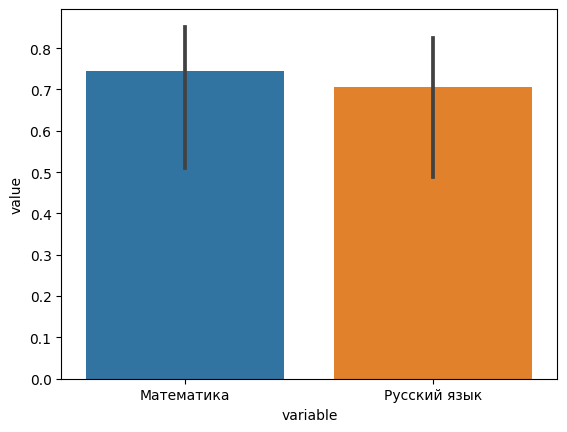

In [13]:
sns.barplot(marks.melt(value_vars=['Математика', 'Русский язык']), x='variable', y='value', estimator='std')

#### Обратную операцию можно выполнить при помощи метода pivot

In [14]:
(marks
    .melt(id_vars=['ФИО', 'Пол'])
    .pivot(index=['ФИО', 'Пол'], columns='variable', values='value')
    .reset_index()
    .head()
)

variable,ФИО,Пол,История,Литература,Математика,Русский язык,Физика,Физическая культура
0,Артамонова Арина Семеновна,женский,3,4,4,4,4,5
1,Бирюкова Арина Александровна,женский,3,3,4,3,4,5
2,Бородина Валерия Даниловна,женский,5,5,3,4,3,5
3,Винниченко Дарья Максимовна,женский,4,5,4,5,3,5
4,Исаева Елизаваета Петровна,женский,3,3,4,4,3,5


### get_dummies

Создание дамми переменных

In [15]:
empl['pos_name']

0               Директор магазина
1                  Старший кассир
2                          Кассир
3                          Кассир
4            Продавец-консультант
                   ...           
29367        Продавец-консультант
29368                   Товаровед
29369                   Товаровед
29370    Мастер по ремонту одежды
29371                     Уборщик
Name: pos_name, Length: 29372, dtype: string

In [16]:
pd.get_dummies(empl['pos_name']).head()

,Бухгалтер,Директор магазина,Заместитель директора магазина,Кассир,Мастер по ремонту одежды,Продавец-консультант,Старший кассир,Товаровед,Уборщик
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [17]:
pd.get_dummies(empl['pos_name'], drop_first=True).head()

,Директор магазина,Заместитель директора магазина,Кассир,Мастер по ремонту одежды,Продавец-консультант,Старший кассир,Товаровед,Уборщик
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


#### Дамми переменные можно автоматически добавлять к датафрейму

In [18]:
pd.get_dummies(empl, columns=['pos_name']).head()

,report_dt,i_pernr,fio,sex,birth_date,education,employee_evaluation,salary,pos_name_Бухгалтер,pos_name_Директор магазина,pos_name_Заместитель директора магазина,pos_name_Кассир,pos_name_Мастер по ремонту одежды,pos_name_Продавец-консультант,pos_name_Старший кассир,pos_name_Товаровед,pos_name_Уборщик
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,1987-03-11,высшее,5,45700.0,0,1,0,0,0,0,0,0,0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,1971-07-07,среднее профессиональное,5,20000.0,0,0,0,0,0,0,1,0,0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,1974-11-29,среднее общее,5,12600.0,0,0,0,1,0,0,0,0,0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,1969-11-01,среднее общее,3,12600.0,0,0,0,1,0,0,0,0,0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,1988-07-17,среднее общее,<NA>,15400.0,0,0,0,0,0,1,0,0,0


In [19]:
pd.get_dummies(empl, columns=['pos_name', 'sex']).head()

,report_dt,i_pernr,fio,birth_date,education,employee_evaluation,salary,pos_name_Бухгалтер,pos_name_Директор магазина,pos_name_Заместитель директора магазина,pos_name_Кассир,pos_name_Мастер по ремонту одежды,pos_name_Продавец-консультант,pos_name_Старший кассир,pos_name_Товаровед,pos_name_Уборщик,sex_женский,sex_мужской
0,2015-01-31,100000,Кожевников Андрей Максимович,1987-03-11,высшее,5,45700.0,0,1,0,0,0,0,0,0,0,0,1
1,2015-01-31,0,Дубинина Надежда Николаевна,1971-07-07,среднее профессиональное,5,20000.0,0,0,0,0,0,0,1,0,0,1,0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,1974-11-29,среднее общее,5,12600.0,0,0,0,1,0,0,0,0,0,1,0
3,2015-01-31,2,Литвинов Александр Максимович,1969-11-01,среднее общее,3,12600.0,0,0,0,1,0,0,0,0,0,0,1
4,2015-01-31,3,Черняева Валерия Глебовна,1988-07-17,среднее общее,<NA>,15400.0,0,0,0,0,0,1,0,0,0,1,0


#### У строчных колонок есть метод .str.get_dummies(), который работает так же

In [20]:
empl['pos_name'].str.get_dummies().head()

,Бухгалтер,Директор магазина,Заместитель директора магазина,Кассир,Мастер по ремонту одежды,Продавец-консультант,Старший кассир,Товаровед,Уборщик
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


### from_dummies

Обратная операция к get_dummies

In [21]:
pd.from_dummies(empl['pos_name'].str.get_dummies()).head()

,
0,Директор магазина
1,Старший кассир
2,Кассир
3,Кассир
4,Продавец-консультант


# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1

На основе таблицы с сотрдуниками создайте таблицу, в которой названия колонок будут означать номер магазина, а в теле таблицы будут перечисленны сотрудники, работающие в каждом магазине по состоянию на 31 декабря 2022 года. То есть в колонке 1 будет лежеть список сотрудников магазина 1, в колонке 2 - список сотрудников магазина 2 и так далее

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Найдите топ 30 пар категорий товаров, которые встерчаются в одном чеке чаще всего.
Необходимо вывести таблицу с колонками: название категории 1, название категории 2, в скольки чеках встечалась такая пара. (Например: юбка, платье, 1234)

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

### Задание 3

Посчитайте накопленный средний чек по каждому магазину за каждый месяц. Например, если вы берете 31 марта 2020 года по магазину 1, то нужно взять все чеки, которые были пробиты в этом магазине до этой даты (не только март 2020 года, а все вплоть до 2015 года) и посчитать по ним среднее.

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 4

Привлечение одного клиента в серднем стоит 1000 рублей. Себестоимоть товара оцените в 40% от обычной цены (поле price в таблице с ценами). Посчитайте сколько дней в среднем требуется, чтобы покупатель окупил затраты магазина на привлечение. 

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 5

Посчитайте ежемесячное удержание клиентов. Для этого для каждого месяца найдите номера клиентов, которые пришли в магазин в этом месяце впервые. Затем посчитайте какой процент из них вернулся через месяц, через 2 месяца и тд.

В итоге должна получиться таблица, в индексе у которой находится дата первого посещения (месяц Х). В шапке таблицы должна быть дата посещения (месяц У). А в каждой ячейке должен быть указан процент людей, который вернулся в магазин в месяце У из тех людей, что впервые пришли в магазин в месяце Х. 

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 6

За каждый месяц найдите накопленное число уникальных клиентов в каждом магазине

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_sample на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_sample = '../tables/sales_sample.parquet' if os.path.exists('../tables/sales_sample.parquet') else 'https://drive.google.com/uc?id=1BgxAxPauzC4LObY3N65PgAvnU3f5QRj2'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_sample)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 7

Найдите магазины, в которых зарплата между сотрудниками одного магазина на конец 2021 года отличалась больше всего и меньше всего

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# напишите свой код здесь

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_17224\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
